<a href="https://colab.research.google.com/github/maadmaaax/Project_NBA_GroupM/blob/main/Analyse_Graphique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4 pandas #requestsfetches the page,beautifulsoup4finds the data on the page, andpandas` organizes it into a table.

In [1]:
#Run the file that possess data loading and cleaning to access relevant data set
!git clone https://github.com/maadmaaax/Project_NBA_GroupM
!jupyter nbconvert --to python Project_NBA_GroupM/Analyse_Principale.ipynb
%run Project_NBA_GroupM/Analyse_Principale.py
!pip install svgpath2mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image, display
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import io
import os
import xml.etree.ElementTree as ET
from svgpath2mpl import parse_path
import matplotlib.patches as patches

Cloning into 'Project_NBA_GroupM'...
remote: Enumerating objects: 651, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 651 (delta 266), reused 225 (delta 225), pack-reused 367 (from 1)
Receiving objects: 100% (651/651), 4.44 MiB | 21.74 MiB/s, done.
Resolving deltas: 100% (297/297), done.
[NbConvertApp] Converting notebook Project_NBA_GroupM/Analyse_Principale.ipynb to python
[NbConvertApp] Writing 17450 bytes to Project_NBA_GroupM/Analyse_Principale.py
fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.

 Winners based on our model vs actual winners:
    Season Team  Final_Power_Score  Actual Rank Team  Win% of actual winner
0     2005  SAC           0.790386            8  PHO               0.756098
1     2006  PHO           0.881307            4  DET               0.780488
2     2007  DET           0.772769            4  DAL               0.817073
3     2008  LAL           0.80

FileNotFoundError: [Errno 2] No such file or directory: 'roster_2026.csv'

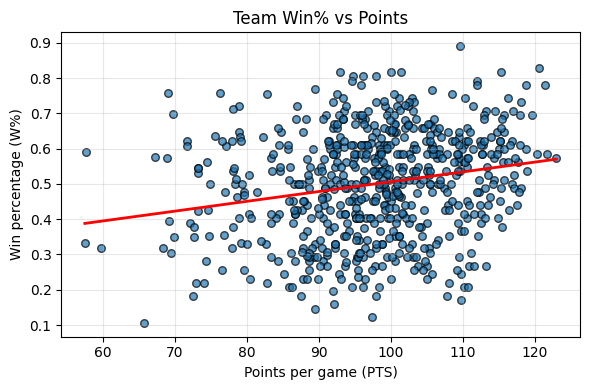

In [2]:

 #Plot team win% vs Point per games
norm=nbas_data_full
norm['PTS']=(norm['PTS']*norm['G'])/82
#Most player played less than 82 game so the mean ppg of player isn't equal to mean ppg of team that why we normalize by 82(total game of a team) to have actual team data
plotdf=norm.groupby(['Season','Team'])[all_stats].sum().reset_index()
plotdf= pd.merge(plotdf,sts_data_full,on=['Team','Season'])
plotdf = plotdf.drop(columns=['Rk'])

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(plotdf['PTS'], plotdf['W%'],
           alpha=0.7,
           s=30,
           color='tab:blue',
           edgecolor='k')

ax.set_xlabel('Points per game (PTS)')
ax.set_ylabel('Win percentage (W%)')
ax.set_title('Team Win% vs Points')
ax.grid(True, alpha=0.3)


x = plotdf['PTS'].values
y = plotdf['W%'].values

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Sort x for a nice line
x_line = np.linspace(x.min(), x.max(), 100)
ax.plot(x_line, p(x_line), color='red', linewidth=2, label='Trend line')



plt.tight_layout()
plt.show()
